# Case Study: Canadian Cheese Directory

# 1. Introduction

In this case study will be analysis Canadian cheeses made from cow, goat, sheep, or buffalo milk. Canada produces more than 1450 cheeses that are listed in the Canadian Cheese Directory. 

The several varieties of cheese have been established according to guidelines including the type of milk, the cheese category, the milk treatment, the fat content, the ripening period and the production method. 

## 1.1 Objective

# 2. Data

## 2.1 Source

The Canadian Cheese Directory dataset was compiled by the Canadian Dairy Information Centre (CDIC) in collaboration with the Ministère de l'Agriculture, des Pêcheries et de l'Alimentation du Québec (MAPAQ). 

For further analysis, the dataset can be on Kaggle:  https://www.kaggle.com/datasets/noahjanes/canadian-cheese-directory?resource=download

Contains information licensed under the Open Government Licence – Canada.

## 2.1 Atributes

This directory offers detailed insights into various cheeses based on essential attributes, including:

- Milk Type: Cow, goat, sheep, or buffalo
- Cheese Category: Fresh, soft, semi-soft, hard, and others
- Milk Treatment: Raw vs. pasteurized
- Fat Content: Varying fat percentages that influence flavor and texture
- Ripening Period: Aging processes ranging from days to years
- Production Method: Artisanal or industrial production

# 3. Ask

Based on the dataset these are the question I would like to explore:
1. What is the distribution of cheeses by milk type (cow, goat, sheep, buffalo)?
2. How does the ripening period affect the fat content and category of cheeses?
3. What are the top provinces in terms of cheese variety and production?
4. How does milk treatment (raw vs. pasteurized) impact the cheese category and ripening period?
5. What is the relationship between fat content and production methods (e.g., artisanal vs. industrial)?

# 4. Process 

## 4.1 Importing Libraries

In [43]:
import pandas as pd
import numpy as np

## 4.2 Importing Data

In [44]:
# STEP 1: COLLECT DATA
df = pd.read_csv('/Users/noahscomputer/Downloads/cheese_data.csv')

## 4.3 Print the first 5 entries

In [45]:
df.head()

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


## 4.4 Print the last 5 entries

In [46]:
df.tail(1)

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
1041,2391,AB,Artisan,31.5,"Available in different flavor: original, herb ...",Soft Squeaky Fresh Cheese.,0,Fresh Cheese,Cow,Pasteurized,No Rind,Super Fresh Cheese Curds,higher fat


## 4.5 Rename headers of the dataframe

In [47]:
# Rename to make them consistent
headers = [ 'cheese_id', 
    'province_code', 
    'manufacturing_type', 
    'moisture_percent', 
    'flavour', 
    'characteristics', 
    'is_organic', 
    'category', 
    'milk_type', 
    'milk_treatment', 
    'rind_type', 
    'cheese_name', 
    'fat_level']

In [48]:
df.columns = headers

In [49]:
#Check Used the head()to displayed the first 3 columns of the data frame

df.head(3)

,cheese_id,province_code,manufacturing_type,moisture_percent,flavour,characteristics,is_organic,category,milk_type,milk_treatment,rind_type,cheese_name,fat_level
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat


## 4.6 Identify the data types of the dataframe columns

In [50]:
df.dtypes

cheese_id               int64
province_code          object
manufacturing_type     object
moisture_percent      float64
flavour                object
characteristics        object
is_organic              int64
category               object
milk_type              object
milk_treatment         object
rind_type              object
cheese_name            object
fat_level              object
dtype: object

## 4.7 Identify the statistical description of the dataset, including that of 'object' data types.

In [51]:
df.describe(include='all')

,cheese_id,province_code,manufacturing_type,moisture_percent,flavour,characteristics,is_organic,category,milk_type,milk_treatment,rind_type,cheese_name,fat_level
count,1042.000000,1042,1042,1028.000000,801,643,1042.000000,1019,1041,977,721,1042,1042
unique,NaN,10,3,NaN,635,535,NaN,6,8,3,4,1038,2
top,NaN,QC,Industrial,NaN,Mild,Creamy,NaN,Firm Cheese,Cow,Pasteurized,No Rind,Ménestrel (Le),lower fat
freq,NaN,796,455,NaN,59,19,NaN,349,743,800,404,2,684
mean,1560.633397,NaN,NaN,47.069747,NaN,NaN,0.095010,NaN,NaN,NaN,NaN,NaN,NaN
std,451.811164,NaN,NaN,9.592647,NaN,NaN,0.293369,NaN,NaN,NaN,NaN,NaN,NaN
min,228.000000,NaN,NaN,12.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1280.250000,NaN,NaN,40.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1548.500000,NaN,NaN,46.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1901.750000,NaN,NaN,52.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


## 4.8 Identify the summary information of the dataset

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cheese_id           1042 non-null   int64  
 1   province_code       1042 non-null   object 
 2   manufacturing_type  1042 non-null   object 
 3   moisture_percent    1028 non-null   float64
 4   flavour             801 non-null    object 
 5   characteristics     643 non-null    object 
 6   is_organic          1042 non-null   int64  
 7   category            1019 non-null   object 
 8   milk_type           1041 non-null   object 
 9   milk_treatment      977 non-null    object 
 10  rind_type           721 non-null    object 
 11  cheese_name         1042 non-null   object 
 12  fat_level           1042 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 106.0+ KB


In [53]:
df.shape

(1042, 13)

## 4.9 Identify missing values

### 4.9.1 Replace '?' with 'NaN'

In [54]:
df.replace('?', np.nan, inplace = True)
df.head(5)

,cheese_id,province_code,manufacturing_type,moisture_percent,flavour,characteristics,is_organic,category,milk_type,milk_treatment,rind_type,cheese_name,fat_level
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


### 4.9.2 Count missing values in each column

In [55]:
df.isnull().sum()

cheese_id               0
province_code           0
manufacturing_type      0
moisture_percent       14
flavour               241
characteristics       399
is_organic              0
category               23
milk_type               1
milk_treatment         65
rind_type             321
cheese_name             0
fat_level               0
dtype: int64

Based on the summary above, each column has 1042 rows of data and seven of the columns containing missing data:

    "moisture_percent": 14 missing data
    "flavour":  241 missing data
    "characteristics": 399 missing data
    "category": 23 missing data
    "milk_type": 1 missing data
    "milk_treatment": 65 missing data
    "rind_type": 321 missing data
    



## 4.10 Deal with missing data 

### 4.10.1 Replace it by mean

In [56]:
moisture_mean = df['moisture_percent'].mean()

In [57]:
df['moisture_percent'].replace(np.nan, moisture_mean, inplace = True )

### 4.10.2 Replace it by other

In [58]:
df['flavour'].replace(np.nan, 'unknown', inplace = True)

In [59]:
df['characteristics'].replace(np.nan, 'Not Specified', inplace = True)

### 4.10.3 Replace it by mode

In [60]:
df['category'].mode()

0    Firm Cheese
Name: category, dtype: object

In [61]:
df['category'].replace(np.nan,'Firm Cheese', inplace = True )

In [62]:
df['milk_type'].value_counts()

Cow                  743
Goat                 214
Ewe                   62
Cow and Goat          13
Ewe and Cow            4
Ewe and Goat           2
Buffalo Cow            2
Cow, Goat and Ewe      1
Name: milk_type, dtype: int64

In [63]:
df['milk_type'].replace(np.nan,'Cow', inplace = True )

In [64]:
df['milk_treatment'].value_counts()

Pasteurized    800
Raw Milk       115
Thermised       62
Name: milk_treatment, dtype: int64

In [65]:
df['milk_treatment'].replace(np.nan, 'Pasteurized', inplace = True)

In [66]:
df['rind_type'].value_counts()

No Rind         404
Bloomy Rind     164
Washed Rind     148
Brushed Rind      5
Name: rind_type, dtype: int64

In [67]:
df['rind_type'].replace(np.nan, 'No Rind', inplace = True)

### 4.10.4 Re-Check if we hava missing values

In [68]:
df.isnull().sum()

cheese_id             0
province_code         0
manufacturing_type    0
moisture_percent      0
flavour               0
characteristics       0
is_organic            0
category              0
milk_type             0
milk_treatment        0
rind_type             0
cheese_name           0
fat_level             0
dtype: int64

### 4.10.5 Check for duplicated values.

In [69]:
df.duplicated().sum()

0

## 4.11 Correct data format

In [70]:
df.dtypes

cheese_id               int64
province_code          object
manufacturing_type     object
moisture_percent      float64
flavour                object
characteristics        object
is_organic              int64
category               object
milk_type              object
milk_treatment         object
rind_type              object
cheese_name            object
fat_level              object
dtype: object

### 4.11.1 Verify if the dataframe includes negative entries 

In [71]:
df[df['moisture_percent'] < 0].count()

cheese_id             0
province_code         0
manufacturing_type    0
moisture_percent      0
flavour               0
characteristics       0
is_organic            0
category              0
milk_type             0
milk_treatment        0
rind_type             0
cheese_name           0
fat_level             0
dtype: int64

In [72]:
df.head(5)

,cheese_id,province_code,manufacturing_type,moisture_percent,flavour,characteristics,is_organic,category,milk_type,milk_treatment,rind_type,cheese_name,fat_level
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,No Rind,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,Not Specified,0,Veined Cheeses,Cow,Raw Milk,No Rind,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,Not Specified,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


# 4.12 Exploratory Data Analysis (EDA) with visualization

Create visualizations to answer the questions:
1. What is the distribution of cheeses by milk type (cow, goat, sheep, buffalo)?
2. What is the distribution of different cheese categories (e.g., soft, hard, semi-soft) across various milk types (cow, goat, sheep, buffalo)?
3. How does milk treatment (raw vs. pasteurized) impact the cheese category?
4. What is the relationship between fat content and production methods (e.g., artisanal vs. industrial)?
5. What are the top provinces in terms of cheese variety and production?
    

In [73]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

#### Question 1
Based on the barplot, what is the distribution of cheeses by milk type (cow, goat, sheep, buffalo)?

In [74]:
milk_type_group = df.groupby('milk_type', as_index = False).agg({'cheese_id': 'count'})

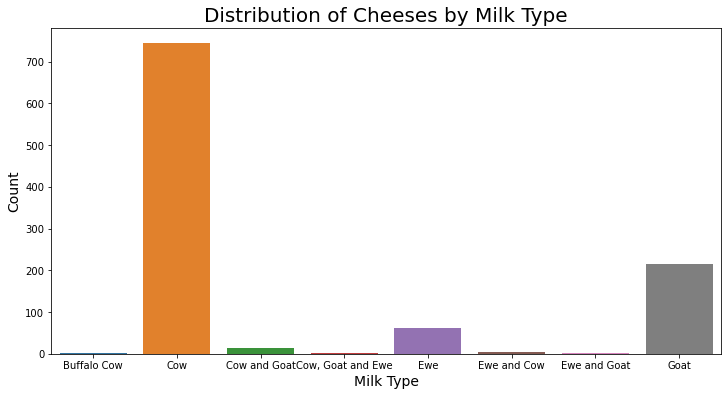

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(data = milk_type_group, x = 'milk_type', y = 'cheese_id')
plt.title('Distribution of Cheeses by Milk Type', fontsize=20)
plt.xlabel('Milk Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
#plt.xticks(rotation=45)
plt.show()

#### Answer

Cow milk is the most common, the second most is goat.

### Sub-question
What is the distribution of different cheese categories (e.g., soft, hard, semi-soft) across various milk types (cow, goat, sheep, buffalo)?

<AxesSubplot:xlabel='milk_type'>

<Figure size 1152x432 with 0 Axes>

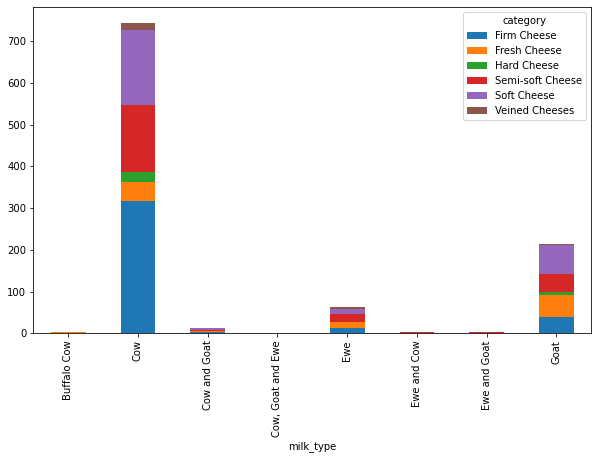

In [142]:
plt.figure(figsize=(16, 6))

# Sample groupby operation to get the counts
category_distribution = df.groupby(['milk_type', 'category'], as_index=False).agg({'cheese_id': 'count'})

# Pivot the data so each 'category' is a column and 'milk_type' is the index
category_distribution = category_distribution.pivot(index='milk_type', columns='category', values='cheese_id')

# Plot a stacked bar chart
category_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))


### Answer

Cow milk dominates the production of many cheese type; firm cheese, soft cheese and semi-soft cheese are mostly made from cow milk. Goat milk is mostly used to produce soft cheese, fresh cheese and firm cheese. Ewe(sheep) milk is moslty used to produce semi-soft cheese and fresh cheese in smaller quantities. 

#### Question 2
How does the average fat content differ between artisanal and industrial cheeses, and how does milk type influence these trends?

In [78]:
manufacturing_distribution = df.groupby(['milk_type','manufacturing_type'] , as_index= False).agg({'cheese_id': 'count'})

<AxesSubplot:xlabel='milk_type', ylabel='cheese_id'>

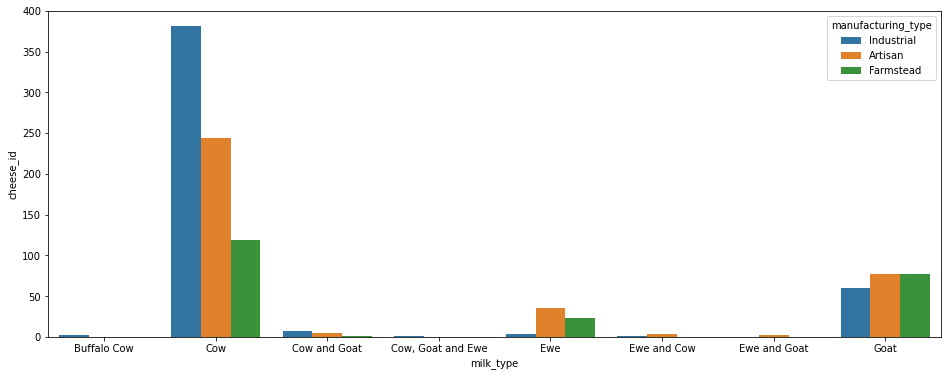

In [79]:
plt.figure(figsize=(16, 6))
sns.barplot(data = manufacturing_distribution, x = 'milk_type', y= 'cheese_id', hue = 'manufacturing_type' )

The majority of cheeses come from cow milk, with the majority being industrial. Artisan and farmstead production are also present with small numbers. The production of got cheeses are balanced between artisan, farmstead  and industrial manufacturing. Other milk types are less common, with few artisan and industial production, but moslty rare. 

### Which type of cheese has the highest fat

In [80]:
manufacturing_distribution = df.groupby(['milk_type','fat_level'] , as_index= False).agg({'cheese_id': 'count'})

<AxesSubplot:xlabel='milk_type', ylabel='cheese_id'>

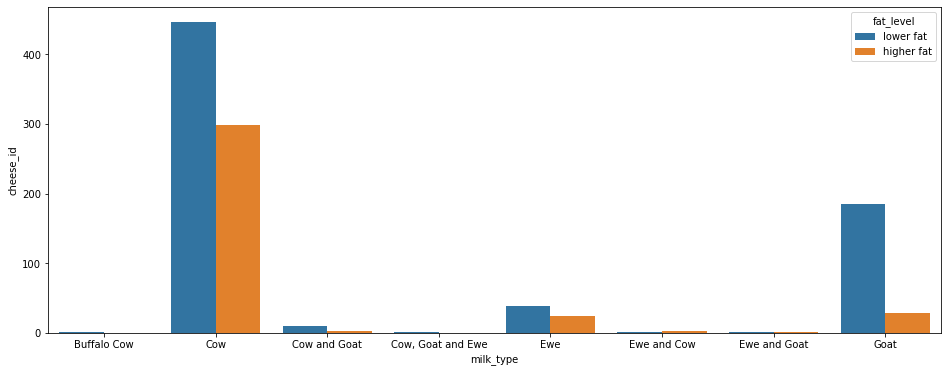

In [81]:
plt.figure(figsize=(16, 6))
sns.barplot(data = manufacturing_distribution, x = 'milk_type', y= 'cheese_id', hue = 'fat_level' )

The above bar chart shows that cow milk cheese is greater in quantity with it's cheese having lower fat content compared to than other milk type. But it also has higher fat content other milk type. Also, goat cheese seems to have lower fat content. 

### Subquestion: milk_type'vs 'milk_treatment'

<AxesSubplot:xlabel='milk_type', ylabel='cheese_id'>

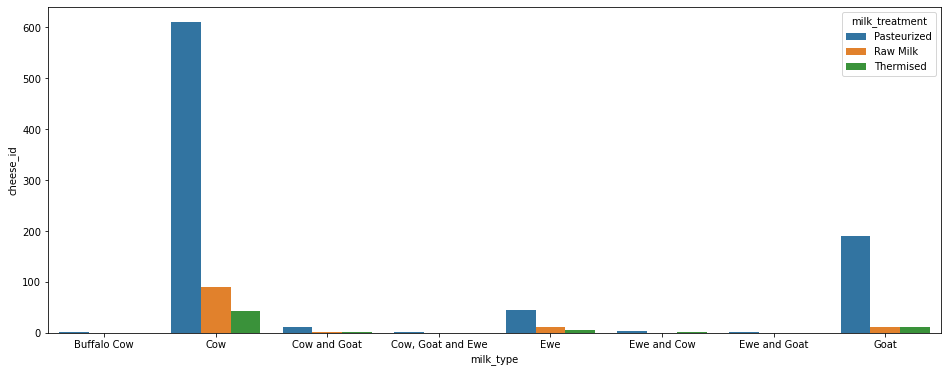

In [82]:
grop = df.groupby(['milk_type','milk_treatment'] , as_index = False).agg({'cheese_id': 'count'})
plt.figure(figsize=(16, 6))
sns.barplot(data = grop, x = 'milk_type', y= 'cheese_id', hue = 'milk_treatment' )

The most common treatment for cow milk is Pasteurized treatment. The large majority of cow milk is being pasteurized. Same with goat milk. 

## What impact does milk treatment (raw vs. pasteurized) have on cheese category ?

In [83]:
grop = df.groupby(['milk_treatment','category'] , as_index = False).agg({'cheese_id': 'count'})

<AxesSubplot:xlabel='milk_treatment', ylabel='cheese_id'>

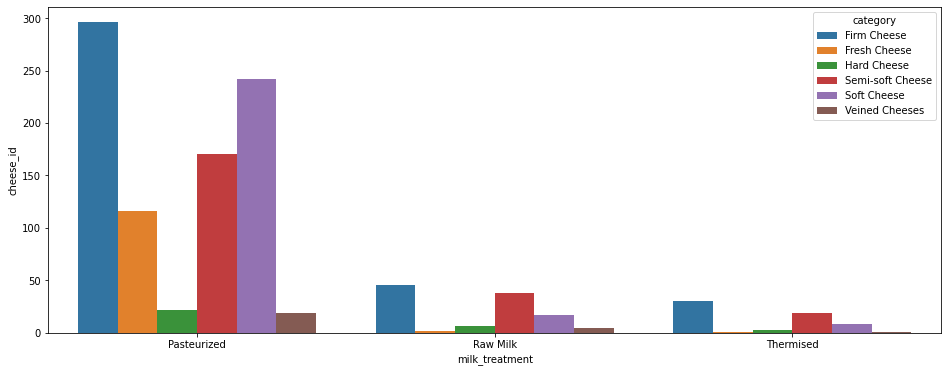

In [84]:
plt.figure(figsize=(16, 6))
sns.barplot(data = grop, x = 'milk_treatment', y= 'cheese_id', hue = 'category' )

### Subquestion:  milk_treatment' vs 'manufacturing_typ

<AxesSubplot:xlabel='milk_treatment', ylabel='cheese_id'>

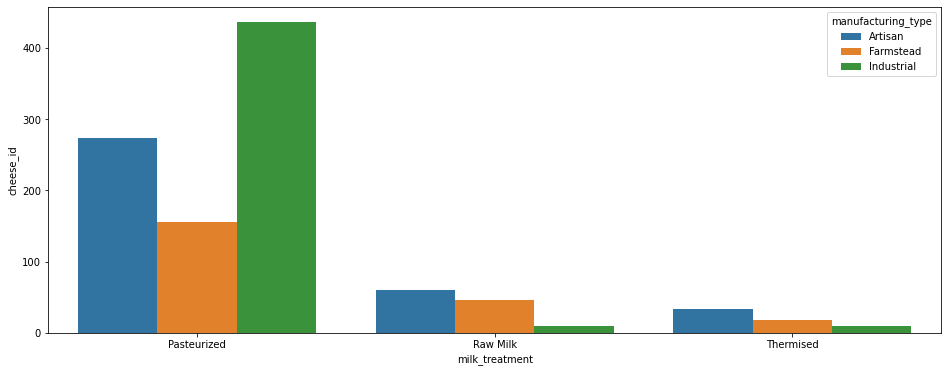

In [85]:
manufacturing_distribution = df.groupby(['milk_treatment','manufacturing_type'] , as_index= False).agg({'cheese_id': 'count'})
plt.figure(figsize=(16, 6))
sns.barplot(data = manufacturing_distribution, x = 'milk_treatment', y= 'cheese_id', hue = 'manufacturing_type' )

Most of the cheese are produced with pasteurized milk which are mainly manufacture by industrial. Artisan manufacturing is frequent in pasteurized, raw milk and thermised milk categories. Farmstead cheeses are mostly produced using pasteurized milk. 

### What impact does milk treatment (raw vs. pasteurized) have on fat content?

In [86]:
fat_group = df.groupby(['milk_treatment','fat_level'], as_index = False).agg({'cheese_id': 'count'})

<AxesSubplot:xlabel='milk_treatment', ylabel='cheese_id'>

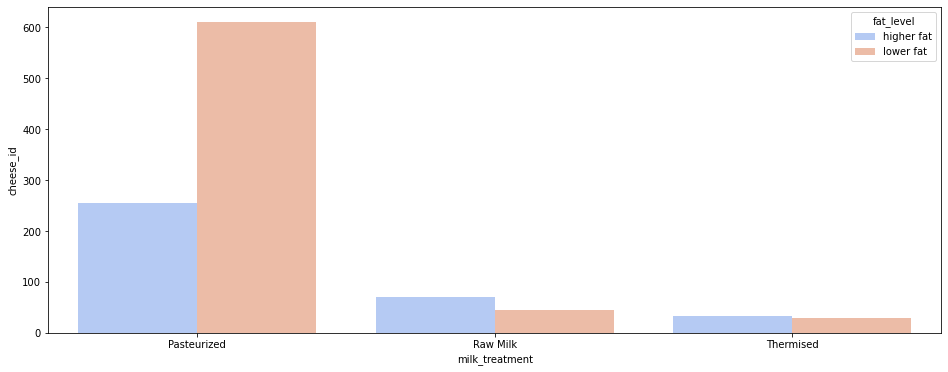

In [87]:
plt.figure(figsize=(16, 6))
sns.barplot(data =fat_group, x = 'milk_treatment', y= 'cheese_id', hue = 'fat_level' , palette="coolwarm")

Pasteurized milk dominates in both higher fat (blue) and lower fat (peach) cheese production. However, there’s a clear trend showing that more cheeses fall into the lower fat category. 

# What is the relationship between fat content and production methods (e.g., artisanal vs. industrial)?

<AxesSubplot:xlabel='manufacturing_type', ylabel='cheese_id'>

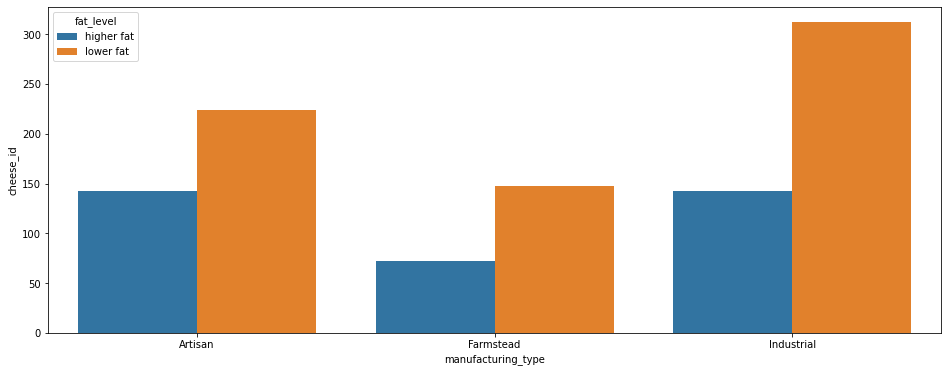

In [88]:
fattss_group = df.groupby(['manufacturing_type','fat_level'], as_index = False).agg({'cheese_id': 'count'})
plt.figure(figsize=(16, 6))
sns.barplot(data =fattss_group, x = 'manufacturing_type', y= 'cheese_id', hue = 'fat_level' )

### Cheeses made from raw milk  are more likely to have  higher fat, while pasteurixed milk is more likely associated with lower-fat cheeses

# How is organic cheese distributed across different fat level?

In [89]:
fattss_group = df.groupby(['fat_level','is_organic'], as_index = False).agg({'cheese_id': 'count'})

<AxesSubplot:xlabel='is_organic', ylabel='cheese_id'>

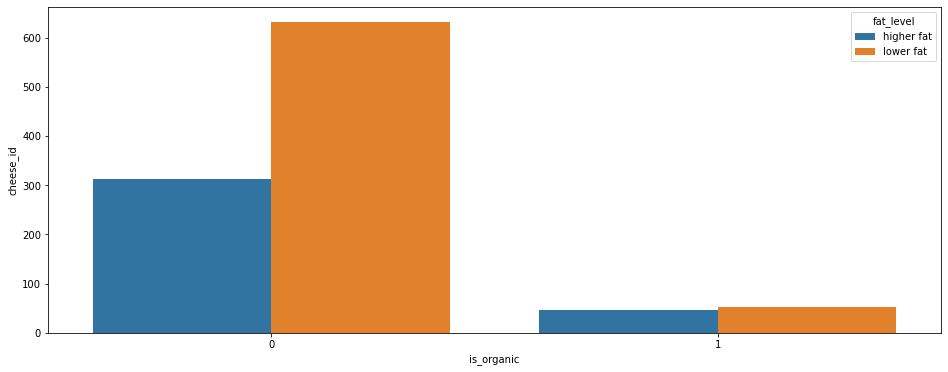

In [90]:
plt.figure(figsize=(16, 6))
sns.barplot(data =fattss_group, x = 'is_organic', y= 'cheese_id', hue = 'fat_level' )

## 3. What are the top provinces in terms of cheese variety and production?

In [92]:
is_organic_countt = df.groupby(['province_code','milk_type'] , as_index= False).agg({'cheese_id': 'count'})

<AxesSubplot:xlabel='milk_type', ylabel='cheese_id'>

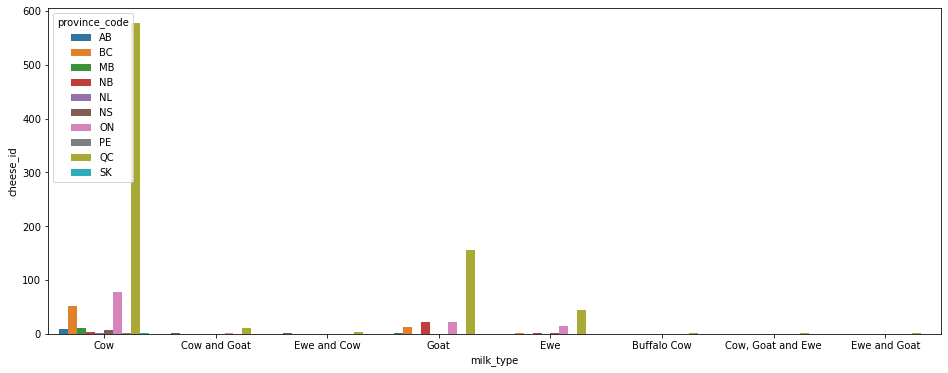

In [ ]:
plt.figure(figsize=(16, 6))

sns.barplot(data = is_organic_countt, x ='milk_type', y = 'cheese_id', hue='province_code' )


 Quebec(QC) is the top producer of cow , goat and Ewe milk in Canada. Ontario is the second largest producer. 

### Question 3
What is the distribution of organic versus non-organic cheeses within each milk type?

In [94]:
is_organic_count = df.groupby(['milk_type','is_organic'] , as_index= False).agg({'cheese_id': 'count'})

<AxesSubplot:xlabel='milk_type', ylabel='cheese_id'>

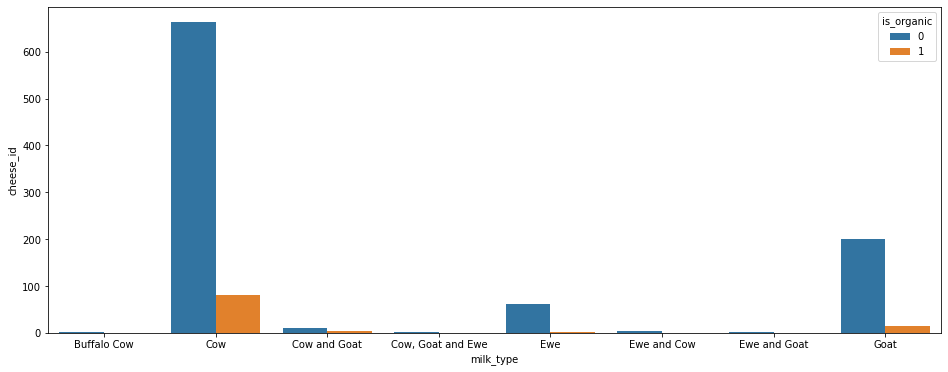

In [95]:
plt.figure(figsize=(16, 6))

sns.barplot(data = is_organic_count, x ='milk_type', y = 'cheese_id', hue='is_organic' )


Most cow milk is non-organic, which isn’t surprising since it usually goes through pasteurization a process to kill off bacteria and keep it fresh longer. 

# Conclusion 

The majority of milk weather be coming from cow, goat, ewe(sheep) is being  pasteurized, which reflects the fouses on safety and the complian with food regulations. Raw milk cheese is the second most common, it might be link to the production of artoisanal industries. 

Pasteurized milk is likely preferred for mass production, given its longer shelf life and safety for large-scale distribution. Industrial processes align with these needs, explaining the dominance.

## Recomendations

Mass producers should continue to develop low-fat pasteurized products to meet growing health trends but might consider premium versions that retain flavor.